株式市場　その1

In [11]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [13]:
#import pandas_datareader.data as web

In [14]:
from datetime import datetime

In [15]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [16]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [17]:
#for stock in tech_list:
#    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [18]:
import quandl
for stock in tech_list:
    globals()[stock] = quandl.get('WIKI/{}'.format(stock),start_date=start,end_date=end)

In [19]:
type(AAPL)

pandas.core.frame.DataFrame

In [20]:
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,156.904910,157.996994,155.759567,156.944774,2.794565e+07,0.005040,1.0,156.509872,157.599537,155.366902,156.549440,2.794565e+07
std,11.747121,11.904199,11.627010,11.749816,1.191534e+07,0.056236,0.0,12.135823,12.296594,12.008651,12.136554,1.191534e+07
min,135.910000,136.660000,135.280000,136.660000,1.394898e+07,0.000000,1.0,134.809110,135.553035,134.184213,135.553035,1.394898e+07
25%,145.627500,146.937500,144.850000,145.840000,2.022628e+07,0.000000,1.0,144.986724,146.117137,144.077911,145.250653,2.022628e+07
50%,156.032500,157.145000,154.870000,155.870000,2.476469e+07,0.000000,1.0,155.890000,156.871969,154.491717,155.613606,2.476469e+07
75%,168.747500,170.105000,166.895000,168.785000,3.211248e+07,0.000000,1.0,168.747500,170.105000,166.895000,168.785000,3.211248e+07
max,179.370000,180.100000,178.250000,179.260000,8.543608e+07,0.630000,1.0,179.370000,180.100000,178.250000,179.260000,8.543608e+07


In [21]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-02-24 to 2018-02-23
Data columns (total 12 columns):
Open           250 non-null float64
High           250 non-null float64
Low            250 non-null float64
Close          250 non-null float64
Volume         250 non-null float64
Ex-Dividend    250 non-null float64
Split Ratio    250 non-null float64
Adj. Open      250 non-null float64
Adj. High      250 non-null float64
Adj. Low       250 non-null float64
Adj. Close     250 non-null float64
Adj. Volume    250 non-null float64
dtypes: float64(12)
memory usage: 25.4 KB


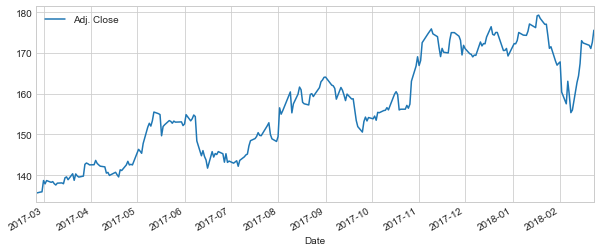

In [22]:
AAPL['Adj. Close'].plot(legend=True,figsize=(10,4))

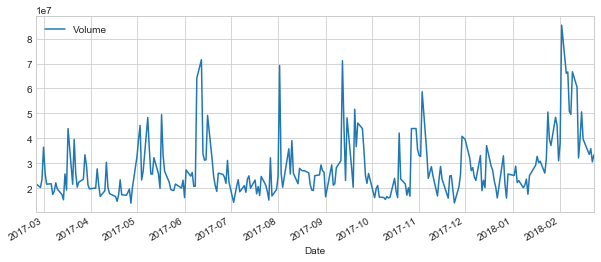

In [23]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

移動平均線

株式市場　その2

In [24]:
#ma_day = [10,20,50]

#for ma in ma_day:
#    column_name = "MA {}".format(str(ma))
#    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

In [25]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA {}'.format(ma)
    AAPL[column_name]=AAPL['Adj. Close'].rolling(window=ma,center=False).mean()

In [26]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-02-24,135.91,136.6600,135.280,136.66,21776585.0,0.0,1.0,134.809110,135.553035,134.184213,135.553035,21776585.0,NaN,NaN,NaN
2017-02-27,137.14,137.4350,136.280,136.93,20257426.0,0.0,1.0,136.029147,136.321757,135.176113,135.820848,20257426.0,NaN,NaN,NaN
2017-02-28,137.08,137.4350,136.700,136.99,23482860.0,0.0,1.0,135.969633,136.321757,135.592711,135.880362,23482860.0,NaN,NaN,NaN
2017-03-01,137.89,140.1500,137.595,139.79,36414585.0,0.0,1.0,136.773071,139.014765,136.480461,138.657681,36414585.0,NaN,NaN,NaN
2017-03-02,140.00,140.2786,138.760,138.96,26210984.0,0.0,1.0,138.865980,139.142323,137.636024,137.834404,26210984.0,NaN,NaN,NaN


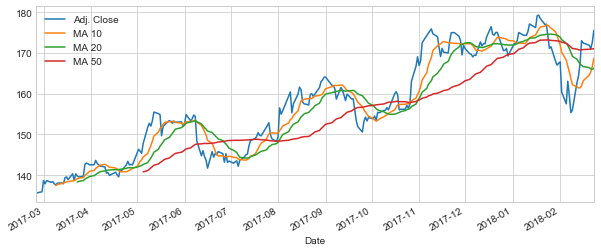

In [27]:
AAPL[['Adj. Close','MA 10','MA 20','MA 50']].plot(subplots=False, figsize=(10,4))

In [28]:
AAPL['Daily Return']=AAPL['Adj. Close'].pct_change()

In [29]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2017-02-24,135.91,136.6600,135.280,136.66,21776585.0,0.0,1.0,134.809110,135.553035,134.184213,135.553035,21776585.0,NaN,NaN,NaN,NaN
2017-02-27,137.14,137.4350,136.280,136.93,20257426.0,0.0,1.0,136.029147,136.321757,135.176113,135.820848,20257426.0,NaN,NaN,NaN,0.001976
2017-02-28,137.08,137.4350,136.700,136.99,23482860.0,0.0,1.0,135.969633,136.321757,135.592711,135.880362,23482860.0,NaN,NaN,NaN,0.000438
2017-03-01,137.89,140.1500,137.595,139.79,36414585.0,0.0,1.0,136.773071,139.014765,136.480461,138.657681,36414585.0,NaN,NaN,NaN,0.020439
2017-03-02,140.00,140.2786,138.760,138.96,26210984.0,0.0,1.0,138.865980,139.142323,137.636024,137.834404,26210984.0,NaN,NaN,NaN,-0.005937


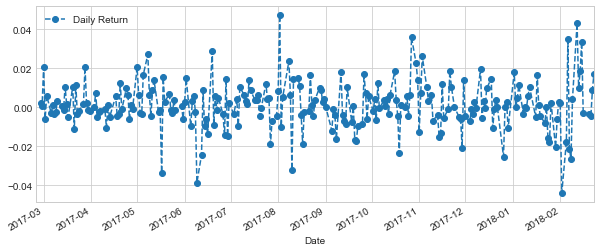

In [30]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

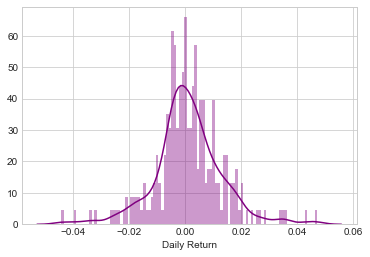

In [31]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

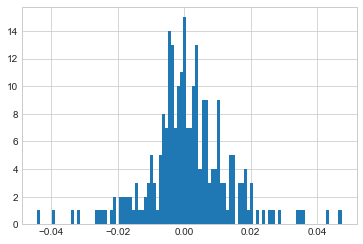

In [32]:
AAPL['Daily Return'].hist(bins=100)

In [33]:
#closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [34]:
AAPL.index

DatetimeIndex(['2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01',
               '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07',
               '2017-03-08', '2017-03-09',
               ...
               '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16', '2018-02-20', '2018-02-21',
               '2018-02-22', '2018-02-23'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [35]:
closing_df=DataFrame(index=AAPL.index,columns=tech_list)
closing_df=closing_df.fillna(0)
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-02-24,0,0,0,0
2017-02-27,0,0,0,0
2017-02-28,0,0,0,0
2017-03-01,0,0,0,0
2017-03-02,0,0,0,0


In [36]:
for stock in tech_list:
    closing_df[stock] = quandl.get('WIKI/{}.11'.format(stock),start_date=start,end_date=end)

In [37]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-02-24,135.553035,828.64,63.596595,845.24
2017-02-27,135.820848,829.28,63.212771,848.64
2017-02-28,135.880362,823.21,62.966731,845.04
2017-03-01,138.657681,835.24,63.911527,853.08
2017-03-02,137.834404,830.63,62.996255,848.91


In [38]:
tech_rets=closing_df.pct_change()

In [39]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-02-24,NaN,NaN,NaN,NaN
2017-02-27,0.001976,0.000772,-0.006035,0.004023
2017-02-28,0.000438,-0.007320,-0.003892,-0.004242
2017-03-01,0.020439,0.014614,0.015005,0.009514
2017-03-02,-0.005937,-0.005519,-0.014321,-0.004888


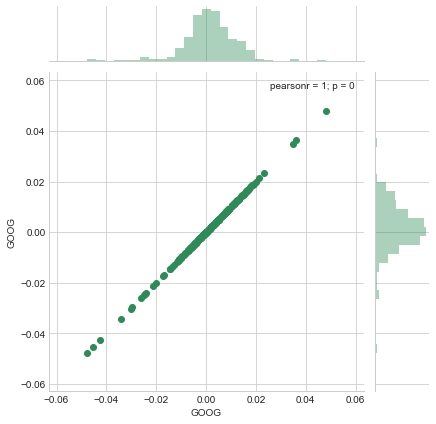

In [40]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

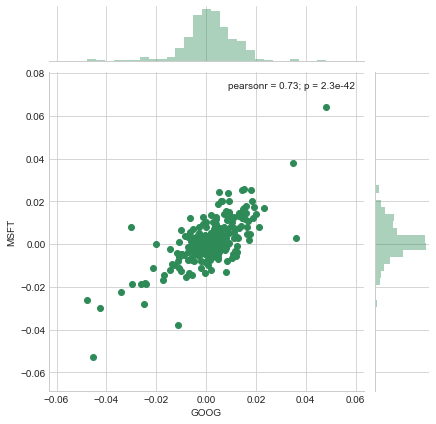

In [41]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

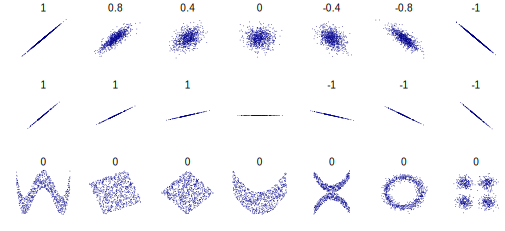

In [42]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

株式市場　その3

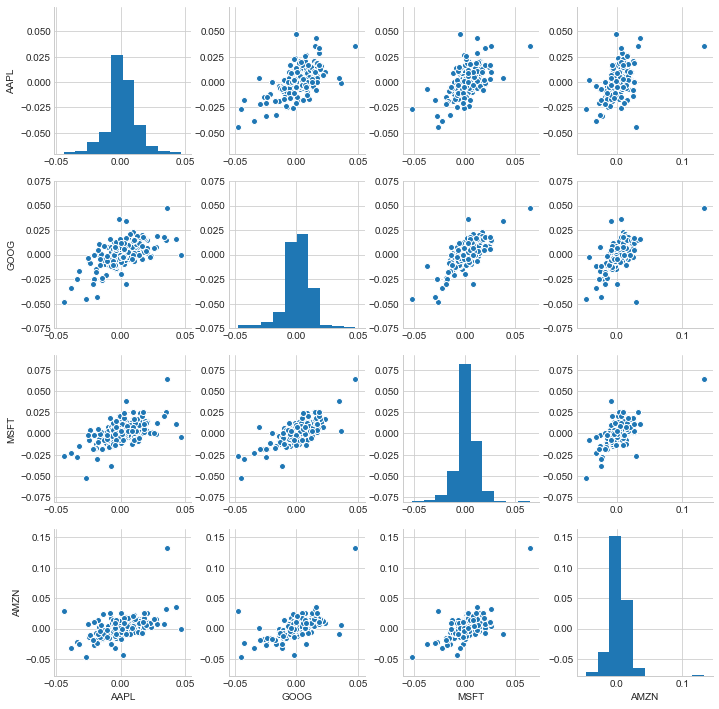

In [43]:
sns.pairplot(tech_rets.dropna())

C:\Users\nakamhik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


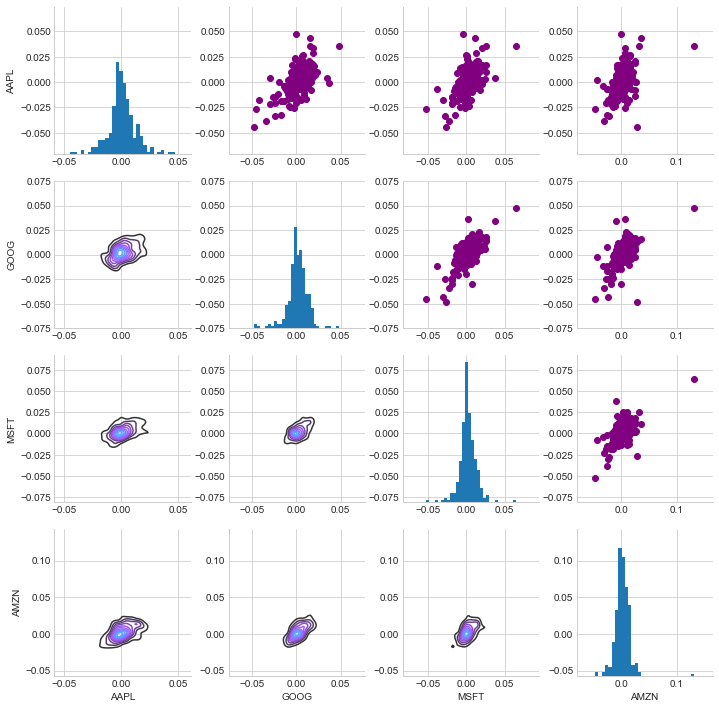

In [52]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

C:\Users\nakamhik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


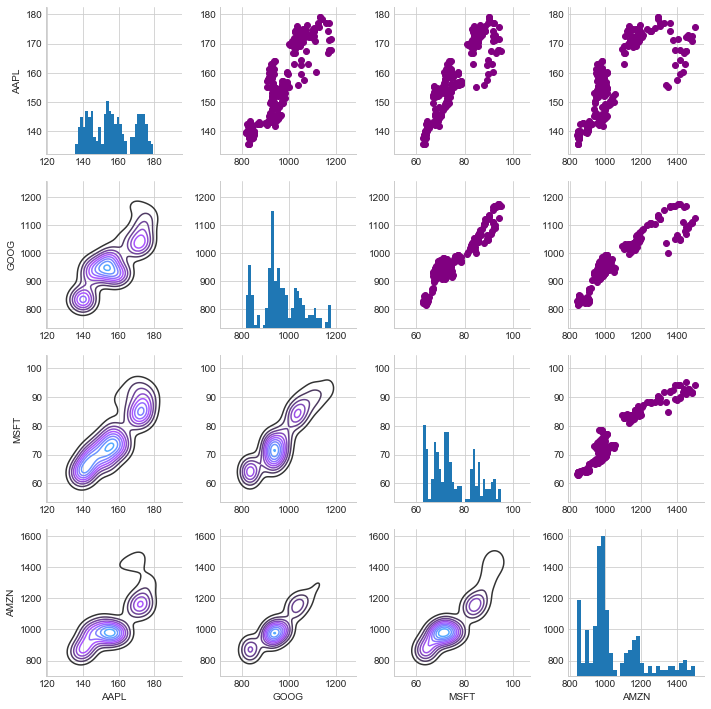

In [53]:
returns_fig=sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

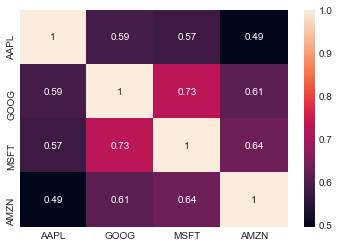

In [55]:
sns.heatmap(tech_rets.corr(),annot=True)

In [ ]:
株式市場　その4